#**ANN in PyTorch**

In this reading material, you'll learn how to build a simple ANN model, train it using training set,tune different hyperparameter using validation test and finally test our built model. Basically, we will be building basic ANN model in pytorch  and evaluate it.

##Prerequisites:


1.   Knowledge about commonly used functions in PyTorch.
2.   Basic workflow of an ANN model.

##Learning Objectives:


1.   Learn about terminologies related to ANN
2.   Learn how to implement a simple ANN in PyTorch.





## Implementing simple ANN using PyTorch

##1.Importing PyTorch

In [ ]:
import torch
from torch import nn

##2. Downloading dataset and Exploring the data
We start by downloading the Fashion MNIST dataset to perform classification.To download it, we use TorchVision datasets API.


In [ ]:
from torchvision import datasets
from torchvision.transforms import ToTensor

# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(), # Read file and convert image to Tensor
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



**Dataset Split ratio :**

 Dataset split normally depends upon two things.First, the total number of samples in  data and second, on the actual model we are training.

 First , we split the data into train set and test set say, $x\%$ data is kept for test set. Remaining $(100-x)\%$ is now split into actual training set and validation set.say $y\%$ is kept for validation set then the final training set becomes $((100-x)-y)\%$ , validation set becomes $y\%$ and test set becomes $x\%$.


Here `training_data` is our **training dataset**. Training Dataset is an actual dataset that we use to train the model (weights and biases in the case of Neural Network). The model sees and learns from this data. Further split of train set into validation set and train set is done later in the code.

`test_data` is our **test dataset**. which is the sample of data used to provide an unbiased evaluation of a final model .Our model only sees the test dataset at the end, it is used as final evaluation of the model

Lets check the shape of train and test datasets.

In [ ]:
print(training_data.data.shape, training_data.targets.shape)
print(test_data.data.shape, test_data.targets.shape)

torch.Size([60000, 28, 28]) torch.Size([60000])
torch.Size([10000, 28, 28]) torch.Size([10000])


Here, `training_data.data` shape (60000,28,28) means it has 60k examples of image each of size 28*28 and `training_data.targets` shape (60000,) means it has one label for each 60k training image. Further Exploration of data is done below:

In [ ]:
# sample data value.

print(training_data.data[0,10:15,10:15])  # 5x5 pixel patch from 28x28 pixel image sample

# full 28x28 sample image can be viewed from the code below

# print(x_train[0,:,:])

print("label", training_data.targets[0])

.............1st sample data value...............
.............5x5 pixel patch from 28x28 pixel image sample ...............
tensor([[  0,   0,   0, 193, 228],
        [  3,   0,  12, 219, 220],
        [  6,   0,  99, 244, 222],
        [  0,   0,  55, 236, 228],
        [  0,   0, 237, 226, 217]], dtype=torch.uint8)
...............1st sample label.................
tensor(9)


##Histogram plot
Now checking total number of label (class) in train dataset and plotting distribution of label in histogram.

......Total number of class is..............
10

.............Class labels are................
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

.............histogram plot of class labels............


(array([6000.,    0., 6000.,    0., 6000.,    0., 6000.,    0., 6000.,
           0.,    0., 6000.,    0., 6000.,    0., 6000.,    0., 6000.,
           0., 6000.]),
 array([0.  , 0.45, 0.9 , 1.35, 1.8 , 2.25, 2.7 , 3.15, 3.6 , 4.05, 4.5 ,
        4.95, 5.4 , 5.85, 6.3 , 6.75, 7.2 , 7.65, 8.1 , 8.55, 9.  ]),
 <a list of 20 Patch objects>)

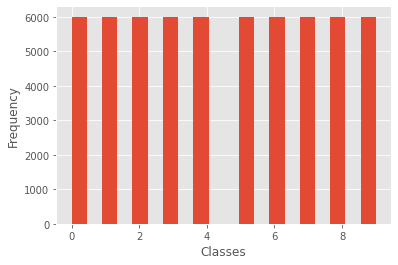

In [ ]:
import matplotlib.pyplot as plt

value = torch.unique(training_data.targets)
print("......Total number of class is..............")
print(len(value))
print("\n.............Class labels are................")
print(value)
print("\n.............histogram plot of class labels............")
plt.style.use('ggplot')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.hist(training_data.targets,bins=20)

Now we split training dataset into data for training and validation.
**Validation dataset** is the sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters. Validation dataset is used to tune different hyperparameters so the model is unbiased. A model never learns from the validation dataset.

Here, we use `torch.utils.data.random_split` api to further split the training dataset. The output will be `Subset` where only indices of original dataset are splited.


In [ ]:
training_data, val_data = torch.utils.data.random_split(training_data, [50000, 10000])

In [ ]:
print(len(training_data.indices))
print(len(val_data.indices))

50000
10000


We can see that after the train-validation split,there are 50000 image samples in the final training set that will be used to train the model and 10000 image samples in the validation set that will be used to evaluate the model.

##3. Plotting training examples



In [ ]:
item_list = {v: k for k, v in training_data.dataset.class_to_idx.items()}
item_list

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

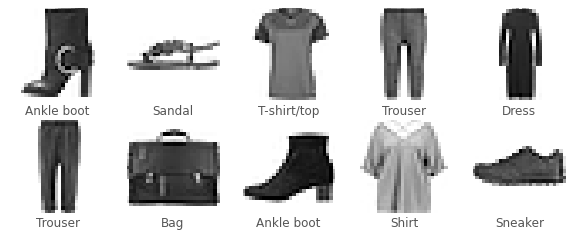

In [ ]:
# plot first few images
plt.figure(figsize=(10,10))
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(training_data[i][0][0], cmap=plt.cm.binary)
  plt.xlabel(item_list[training_data[i][1]])
plt.show()

Now we create a `DataLoader` object from dataset for iterating over dataset during training and evaluation supporting automatic batching, sampling, and multiprocess data loading.

In [ ]:
batch_size = 128

from torch.utils.data import DataLoader

# we shuffle during training only
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

Now we have training, validation and test data ready . Our next step is to build an image classification model using ANN.



##Classification using PyTorch

We will firstly implement the classification task using PyTorch library.

##1. Defining the model parameters

In [ ]:
import numpy as np

# the model here will be made of 1 input layer, 3 hidden layers and 1 ouput layer.
input_size=np.prod(training_data[0][0].shape[-2:])
output_size=len(training_data.dataset.classes)
hidden_1_shape=128
hidden_2_shape=64
hidden_3_shape=32

##3. Using the nn.Module Subclasing to create the DL model

DL Model is  a trained (or yet to be trained) model which is expected to perform some intelligent stuff. For eg. A diabetes prediction model consist of neural net which can predict whether a person has diabetes when certain features are provided.


In [ ]:
# building model by stacking layers
class DLModel(nn.Module):
    def __init__(self):
        super(DLModel, self).__init__()
        self.flatten = nn.Flatten()
        self.stacked_layers = nn.Sequential(
            nn.Linear(input_size, hidden_1_shape),
            nn.ReLU(),
            nn.Linear(hidden_1_shape, hidden_2_shape),
            nn.ReLU(),
            nn.Linear(hidden_2_shape, hidden_3_shape),
            nn.ReLU(),
            nn.Linear(hidden_3_shape, output_size),
        )

    def forward(self, inputs):
        return self.stacked_layers(self.flatten(inputs))

model=DLModel()
print(model)

DLModel(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (stacked_layers): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=10, bias=True)
  )
)


##4.Selecting Loss Function and Optimizer

In [ ]:
# refer to optimizer and loss function chapter to understand, there are several others too
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

##5. Model Training

 **Hyperparameter Tuning :**

 Parameters which define the model architecture are referred to as hyperparameters and thus this process of searching for the ideal model architecture is referred to as hyperparameter tuning.

Some basic example of hyperparameters can be :


*   What should be the value of learning rate  for gradient descent?

*   How many trees should I include in my random forest?

*   How many layers should my neural network have?

*   How many neurons should I have in my neural network layer?
etc and many more.


The most important and basic  concept  is that hyperparameters are not model parameters and they cannot be directly trained from the data. Model parameters are learned during training when we optimize a loss function using something like gradient descent.



**Training Function**

We'll define a function that loops over the training dataset in batches and does model optimization. We'll also write some logging code to display training information like loss, accuracy, etc.

In [ ]:
def train(dataloader, model, loss_func, optimizer):
    num_examples = len(dataloader.dataset)
    num_batches = len(dataloader)

    # Put model in training mode
    model.train()

    # Initialize variable to store epoch loss and accuracy
    epoch_loss = 0
    epoch_correct = 0

    # Loops over the training data on batch
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction error
        pred = model(X)
        loss = loss_func(pred, y)

        # Remove any previous gradient calculation done by optimizer
        optimizer.zero_grad()

        # Perform backward propagation
        loss.backward()

        # Perform gradient update
        optimizer.step()

        # Calculate accuracy
        epoch_correct += (pred.argmax(dim=-1) == y).sum().item()
        epoch_loss += loss.item()

        # Log at every 100 steps of training
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{num_examples:>5d}]")

    # return epoch avg loss and accuracy
    return epoch_loss/num_batches, epoch_correct/num_examples

**Evaluation Function**

We'll define a function that loops over the validation/test dataset in batches and does model evaluation. We'll also write some logging code to display evaluation information like loss, accuracy, etc.

In [ ]:
def evaluate(dataloader, model, loss_func):
    num_examples = len(dataloader.dataset)
    num_batches = len(dataloader)

    # Put model in evalutation mode
    model.eval()

    # Initialize variable to store loss and accuracy
    test_loss = 0
    test_correct = 0

    # disable gadient calculation during evaluation
    with torch.no_grad():
        # Loops over the evaluation data on batch
        for batch, (X, y) in enumerate(dataloader):
            # Compute prediction error
            pred = model(X)
            loss = loss_func(pred, y)

            # Calculate accuracy
            test_correct += (pred.argmax(dim=-1) == y).sum().item()
            test_loss += loss.item()

    # Eval metrics
    test_loss = test_loss/num_batches
    test_accuracy = test_correct/num_examples
    print(f"Val Metrics: Loss: {test_loss}, Accuracy: {test_accuracy}")
    # return avg loss and accuracy
    return test_loss, test_accuracy

**Train and Evaluate Model**
The training is done for several iterations(epochs). At the end of each epoch we evaluate the model in validation set.

In [ ]:
epochs = 30
history = {
    'loss': [],
    'val_loss': [],
    'accuracy': [],
    'val_accuracy': [],
}
for ep in range(epochs):
    print(f"Epoch: {ep + 1}\n--------------------------------")
    train_loss, train_acc = train(train_dataloader, model, loss_func, optimizer)
    val_loss, val_acc = evaluate(val_dataloader, model, loss_func)

    history['loss'].append(train_loss)
    history['val_loss'].append(val_loss)
    history['accuracy'].append(train_acc)
    history['val_accuracy'].append(val_acc)

print("Training Complete")

Epoch: 1
--------------------------------
loss: 2.308591  [    0/50000]
loss: 0.723253  [12800/50000]
loss: 0.585041  [25600/50000]
loss: 0.426599  [38400/50000]
Val Metrics: Loss: 0.4833574766599679, Accuracy: 0.8272
Epoch: 2
--------------------------------
loss: 0.494265  [    0/50000]
loss: 0.373949  [12800/50000]
loss: 0.436610  [25600/50000]
loss: 0.470455  [38400/50000]
Val Metrics: Loss: 0.4269138680228704, Accuracy: 0.8481
Epoch: 3
--------------------------------
loss: 0.371796  [    0/50000]
loss: 0.452364  [12800/50000]
loss: 0.343464  [25600/50000]
loss: 0.357870  [38400/50000]
Val Metrics: Loss: 0.3895212027091014, Accuracy: 0.8585
Epoch: 4
--------------------------------
loss: 0.318497  [    0/50000]
loss: 0.352078  [12800/50000]
loss: 0.303401  [25600/50000]
loss: 0.313424  [38400/50000]
Val Metrics: Loss: 0.36471054391770424, Accuracy: 0.8667
Epoch: 5
--------------------------------
loss: 0.324544  [    0/50000]
loss: 0.442693  [12800/50000]
loss: 0.373014  [25600/50

##6. Visualizing Training Loss and Validation Loss

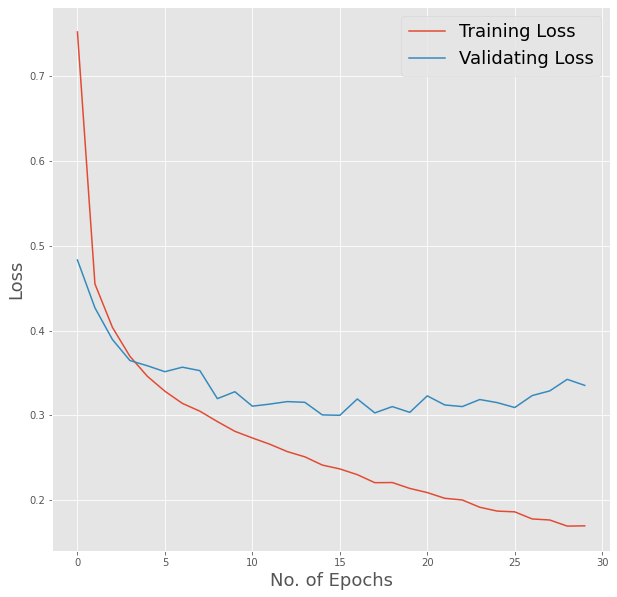

In [ ]:
# to visualize the train and validation loss throughout the process

x = range(0,epochs)
plt.figure(figsize=(10,10))
plt.plot(x, history['loss'], label='Training Loss')
plt.plot(x, history['val_loss'], label='Validating Loss')
plt.xlabel('No. of Epochs', fontsize=18)
plt.ylabel('Loss',fontsize=18)
plt.legend(loc='upper right',fontsize=18)

In the plot above, we can see two curves : one for training loss and one validation loss. **Training loss** is the loss calculated on the train set (which includes **both forward and backward propagation**) whereas **validation loss** is calculated on the validation set(which includes only forward propagation of validation data through the model being trained on the train set).

##7.Testing the Model

Now, we use the trained model on our test set to predict class labels.

In [ ]:
loss,accuracy = evaluate(test_dataloader, model, loss_func)

print('\nTest accuracy:', accuracy)

Val Metrics: Loss: 0.3808965643372717, Accuracy: 0.8848

Test accuracy: 0.8848


In [ ]:
# predicting value at final layer for each example in the test set
prediction = torch.Tensor()
y_test = torch.Tensor()
X_test = torch.Tensor()
for X, y in test_dataloader:
    with torch.no_grad():
        # Need to calculate probability from softmax
        pred = torch.softmax(model(X), dim=-1)
        prediction = torch.concat([prediction, pred])
        y_test = torch.concat([y_test, y])
        X_test = torch.concat([X_test, X])

In [ ]:
# since we have 10 nodes at final layer and 10000 examples
# sum of value of 10 nodes for each example = 1 , since softmax at final layer
# value at each node is probability of that example to be of that class.
prediction.shape

torch.Size([10000, 10])

In [ ]:
# choosing class with highest probability
predicted = prediction.argmax(dim=-1)

In [ ]:
# since we have 10000 examples 'predicted' has class with highest probability for each
predicted.shape

# let us check the class for out first test sample
print('\n Predicted class for 1st test sample:', predicted[0])
print('\n Actual class for 1st test sample:', y_test[0])


 Predicted class for 1st test sample: tensor(9)

 Actual class for 1st test sample: tensor(9.)


##8.Displaying the Predicted Results

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  '''function to plot sample images with
  actual and predicted labels'''
  predictions_array, true_label, img = predictions_array, true_label[i].item(), img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  # for the image plot, we check if the predicted label is equal to the actual label or not.
  predicted_label = predictions_array.argmax(dim=-1).item()
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  # we label the images as Predicted class, predicted probability and actual label
  plt.xlabel("{} {:2.0f}% (Actual:{})".format(item_list[predicted_label],
                                              100*predictions_array.max().item(),
                                              item_list[true_label]),
                                              color=color,fontsize=18)

def plot_value_array(i, predictions_array, true_label):
  '''function to plot prediction probability for sample images'''
  predictions_array, true_label = predictions_array, int(true_label[i].item())
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  plt.xlabel('Classes')
  plt.ylabel('Probability')
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = predictions_array.argmax(dim=-1).item()

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

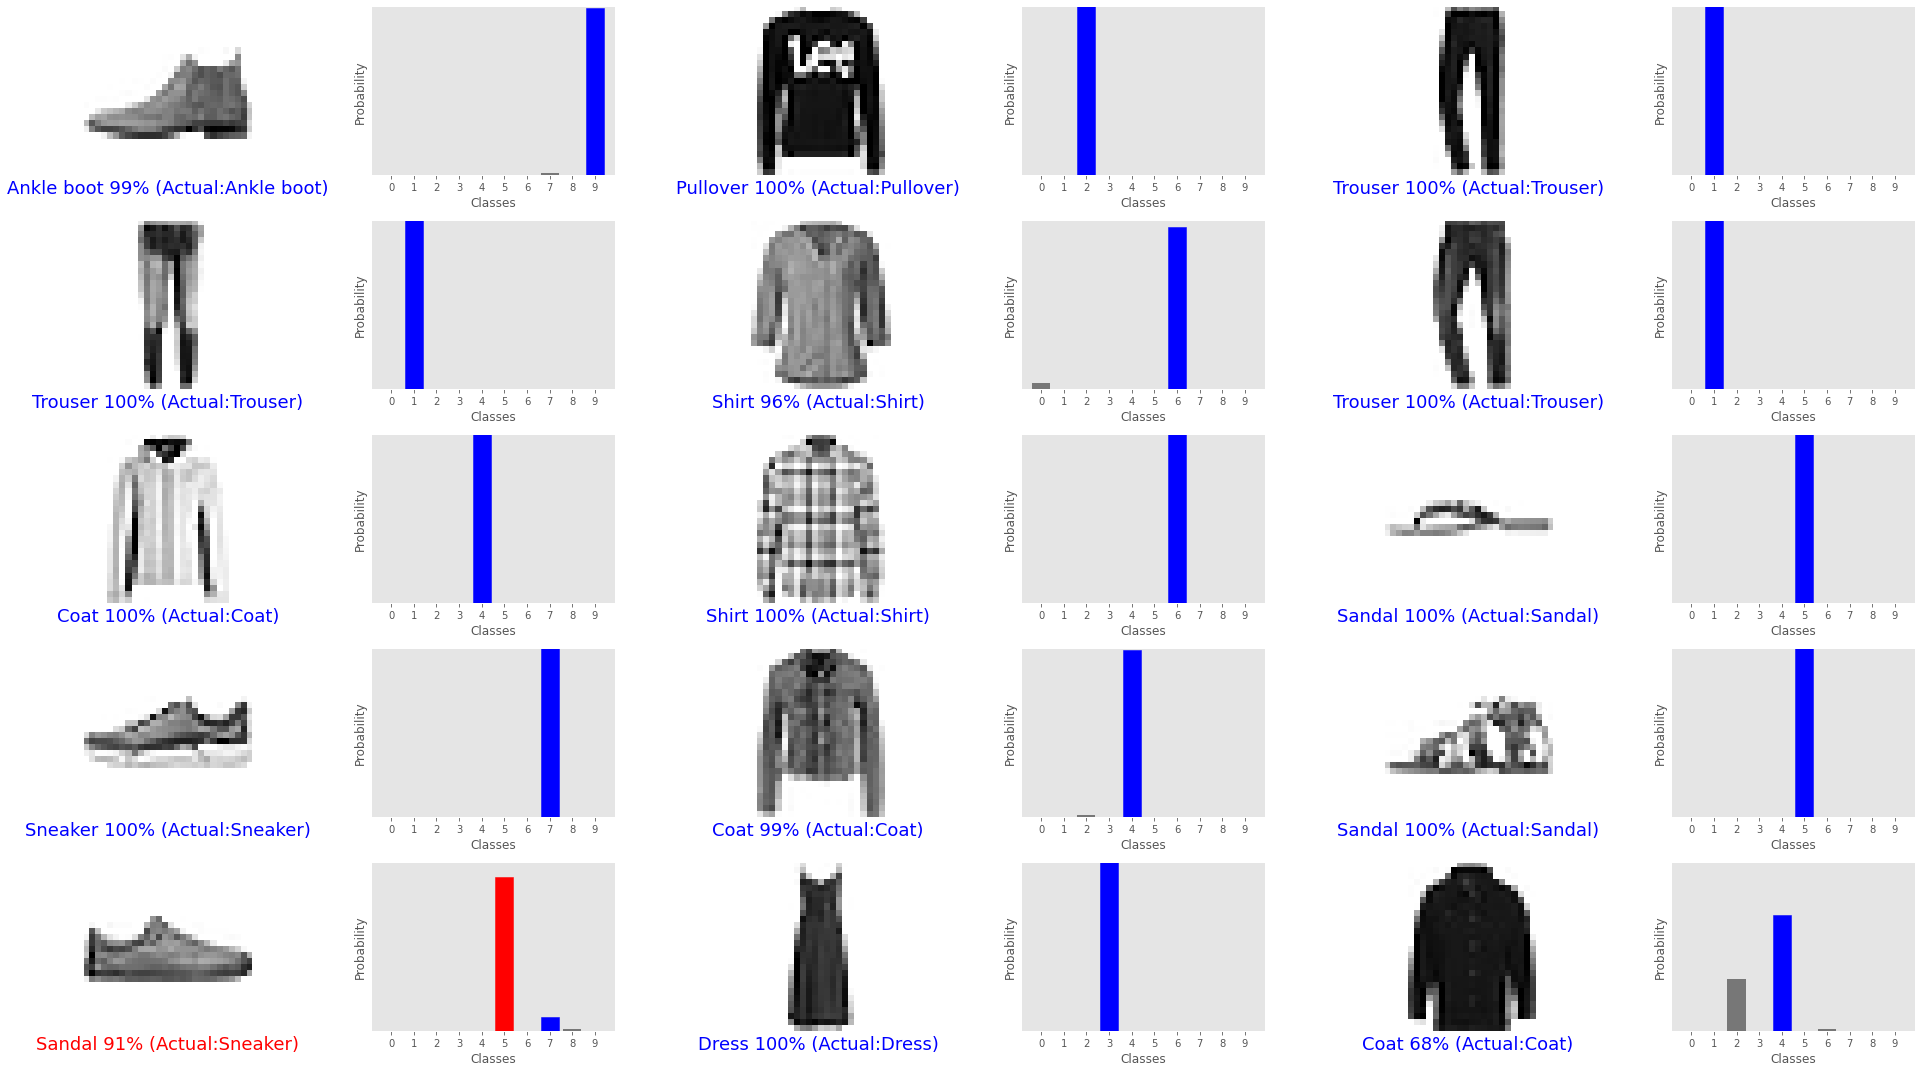

In [ ]:
# We now plot the first X test images, their predicted labels, and the true labels.
# the colors as mentioned above: correct predictions in blue and incorrect predictions in red.

# Remove extra dimension
X_test = torch.squeeze(X_test)

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(3*3*num_cols, 3*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prediction[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prediction[i], y_test)
plt.tight_layout()
plt.show()

We can see from the above plot and predictions that our model is **not 100% accurate** in its predictions. This is pretty common in machine learning projects and a perfect accuracy score is more of a **theoretical concept**. Surely, our aim should be to obtain as much accuracy as possible and depending on our task it can be other metrics that we might want to improve. Moreover, the metrics scores that we want to settle for will also depend on the area we are planning to apply the model results. Concerns about underfitted and overfitted model may also arise. To put it simply for now, a model is said to be **underfitted when it over simplifies the given problem** and performs badly on both train and test data. On the other hand, an overfitted model is one that **fits to the training data so well that it loses its ability to generalize on the test data**. In the later chapters, we will study about ways to improve our model. But for now, this Deep Learning Pipeline can be a base for building future models.

##Key Takeaways:


1.   The dataset available to us is usually split into train, validation and test set.
2. 100% accuracy in DL models is more of a theoretical concept.

